In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

48.5013275268748 -152.8157911628773
77.94127551198798 -168.30068724089685
75.13459337432971 -69.88605331306704
0.5358995571801302 -67.82939856049953
-71.7995933575724 -173.64679254961453
7.74512257413123 -10.471988370481228
70.58086096628955 -29.727779966697938
5.7846617298025365 -50.95131069740506
-48.02690868068372 -35.05059551851983
46.6232561802926 -140.9770004076834
-0.09550964171117471 -77.9203972937589
-77.40432591382478 -139.33643929318737
54.02325232776414 69.3491859763933
71.93139328394932 166.05278548645367
-34.37226909725198 24.444271443606937
-42.300409741473686 86.51847426989826
-36.79234031337193 99.71783361949286
-61.11777620856586 53.69566424595854
50.5630546115496 -62.00653608628002
-13.110521683436403 64.58627664270631
-43.63067665102459 -178.60848842271363
4.87934270774015 -150.08718176852807
-82.48418497717748 -124.84698396162344
-47.934707254807996 -18.391688685308907
83.85785611745479 -167.22945540070756
-47.63894228482952 -81.40896990666816
6.6712046183010045 17

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | lavrentiya
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | sao gabriel da cachoeira
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | jojoima
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | cayambe
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | krasnoarmeysk
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | havre-saint-pierre
Processing Record 19 of Set 1 | grand gaube
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | arraial do ca

Processing Record 39 of Set 4 | bireun
Processing Record 40 of Set 4 | kerema
Processing Record 41 of Set 4 | makakilo city
Processing Record 42 of Set 4 | inderborskiy
City not found. Skipping...
Processing Record 43 of Set 4 | alvorada
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | kungurtug
Processing Record 47 of Set 4 | bambous virieux
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | halalo
City not found. Skipping...
Processing Record 50 of Set 4 | hambantota
Processing Record 1 of Set 5 | guadalupe
Processing Record 2 of Set 5 | chitral
Processing Record 3 of Set 5 | kondinskoye
Processing Record 4 of Set 5 | victoria point
Processing Record 5 of Set 5 | woodland
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | caravelas
Processing Record 8 of Set 5 | zharkent
Processing Record 9 of Set 5 | jurmala
Processing Record 10 of Set 5 | nome
Processing Record 11 of Set 5 | navoi
Pro

Processing Record 30 of Set 8 | bay roberts
Processing Record 31 of Set 8 | civitavecchia
Processing Record 32 of Set 8 | chippewa falls
Processing Record 33 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 34 of Set 8 | daura
Processing Record 35 of Set 8 | tidore
City not found. Skipping...
Processing Record 36 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 8 | along
Processing Record 38 of Set 8 | akdepe
Processing Record 39 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 40 of Set 8 | wagga wagga
Processing Record 41 of Set 8 | mehamn
Processing Record 42 of Set 8 | maniitsoq
Processing Record 43 of Set 8 | thouars
Processing Record 44 of Set 8 | broome
Processing Record 45 of Set 8 | deputatskiy
Processing Record 46 of Set 8 | zambezi
Processing Record 47 of Set 8 | andenes
Processing Record 48 of Set 8 | provideniya
Processing Record 49 of Set 8 | meulaboh
Processing Record 50 of Set 8 | saldanha
Pr

Processing Record 15 of Set 12 | mopti
Processing Record 16 of Set 12 | lolua
City not found. Skipping...
Processing Record 17 of Set 12 | asyut
Processing Record 18 of Set 12 | sinnamary
Processing Record 19 of Set 12 | santa rosa
Processing Record 20 of Set 12 | college
Processing Record 21 of Set 12 | lokoja
Processing Record 22 of Set 12 | nemuro
Processing Record 23 of Set 12 | zhezkazgan
Processing Record 24 of Set 12 | moose factory
Processing Record 25 of Set 12 | phanat nikhom
Processing Record 26 of Set 12 | patacamaya
Processing Record 27 of Set 12 | rudabanya
Processing Record 28 of Set 12 | elko
Processing Record 29 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 30 of Set 12 | dhidhdhoo
Processing Record 31 of Set 12 | harper
Processing Record 32 of Set 12 | dabola
Processing Record 33 of Set 12 | faya
Processing Record 34 of Set 12 | kizema
Processing Record 35 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 36 of Set 12 | nador

In [9]:
len(city_data)

594

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,29.71,93,100,4.61,US,2022-02-07 22:45:04
1,Lavrentiya,65.5833,-171.0000,-18.56,77,32,15.66,RU,2022-02-07 22:45:04
2,Narsaq,60.9167,-46.0500,8.82,54,100,23.49,GL,2022-02-07 22:45:05
3,Sao Gabriel Da Cachoeira,-0.1303,-67.0892,73.51,98,100,2.71,BR,2022-02-07 22:45:05
4,Vaini,-21.2000,-175.2000,80.76,94,100,10.36,TO,2022-02-07 22:45:05
5,Jojoima,7.8792,-10.7878,72.86,87,81,2.64,SL,2022-02-07 22:45:05
6,Cayenne,4.9333,-52.3333,81.09,84,40,4.61,GF,2022-02-07 22:45:06
7,Chuy,-33.6971,-53.4616,65.28,74,26,11.16,UY,2022-02-07 22:45:06
8,Sitka,57.0531,-135.3300,40.89,75,100,8.05,US,2022-02-07 22:42:48
9,Cayambe,0.0500,-78.1333,54.66,89,99,0.85,EC,2022-02-07 22:40:57


In [11]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kodiak,100,US,2022-02-07 22:45:04,93,57.7900,-152.4072,29.71,4.61
1,Lavrentiya,32,RU,2022-02-07 22:45:04,77,65.5833,-171.0000,-18.56,15.66
2,Narsaq,100,GL,2022-02-07 22:45:05,54,60.9167,-46.0500,8.82,23.49
3,Sao Gabriel Da Cachoeira,100,BR,2022-02-07 22:45:05,98,-0.1303,-67.0892,73.51,2.71
4,Vaini,100,TO,2022-02-07 22:45:05,94,-21.2000,-175.2000,80.76,10.36
5,Jojoima,81,SL,2022-02-07 22:45:05,87,7.8792,-10.7878,72.86,2.64
6,Cayenne,40,GF,2022-02-07 22:45:06,84,4.9333,-52.3333,81.09,4.61
7,Chuy,26,UY,2022-02-07 22:45:06,74,-33.6971,-53.4616,65.28,11.16
8,Sitka,100,US,2022-02-07 22:42:48,75,57.0531,-135.3300,40.89,8.05
9,Cayambe,99,EC,2022-02-07 22:40:57,89,0.0500,-78.1333,54.66,0.85


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644274800.0510826

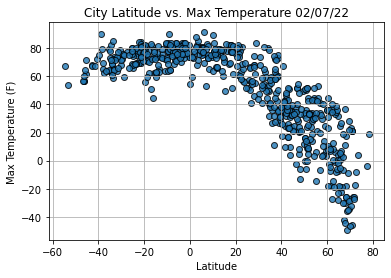

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

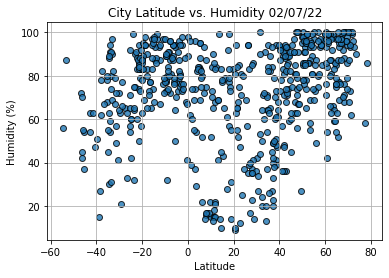

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

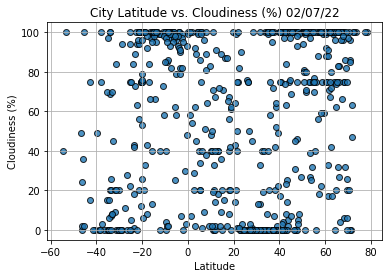

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

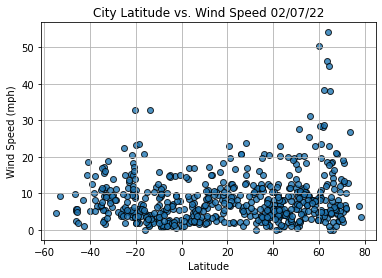

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

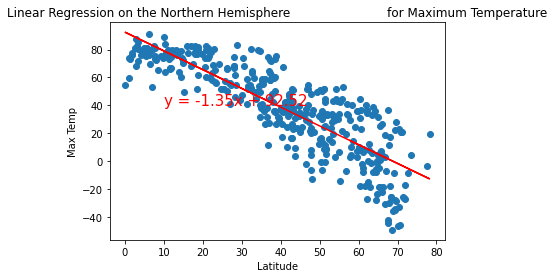

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

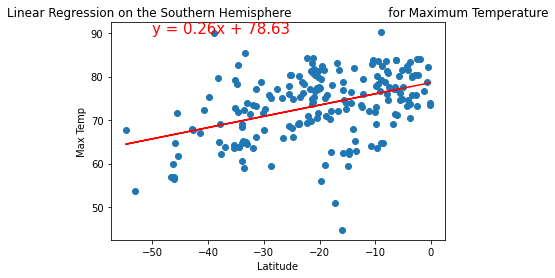

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

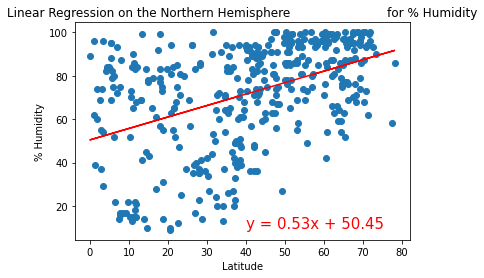

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

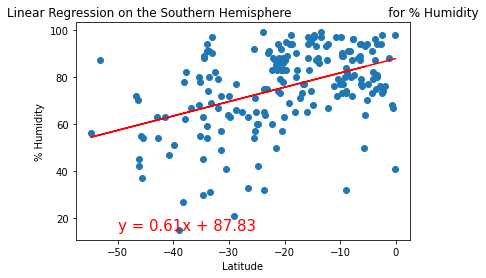

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

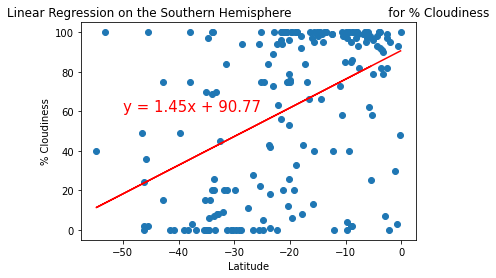

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

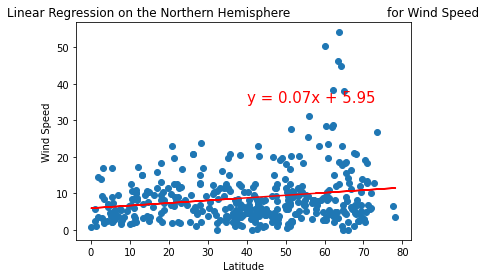

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

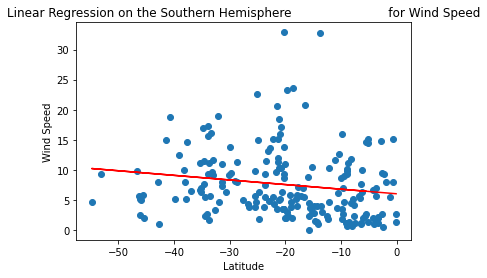

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [35]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (C:\Users\m128950\OneDrive - Mayo Clinic\Strategy\Desktop\Bootcamp\World_Weather_Analysis\config.py)